In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\LENOVO\Desktop\Data Analytics\10days challenge\Day9\airline_flights.csv")

In [3]:
df.head()

,Flight_ID,Date,Airline,Origin_Airport,Destination_Airport,Scheduled_Departure,Actual_Departure,Scheduled_Arrival,Actual_Arrival,Status,Passengers
0,FL1000,13-04-2023,IndiGo,CCU,HYD,17-08-2023 19:00,08-06-2023 22:00,24-10-2023 22:00,28-01-2023 04:00,Delayed,190
1,FL1001,15-12-2023,IndiGo,GOI,BOM,18-04-2023 00:00,12-03-2023 17:00,13-06-2023 07:00,10-02-2023 12:00,Delayed,158
2,FL1002,28-09-2023,Air India,GOI,MAA,21-06-2023 09:00,08-11-2023 09:00,26-03-2023 10:00,21-12-2023 22:00,On-time,130
3,FL1003,17-04-2023,Vistara,HYD,GOI,12-04-2023 07:00,29-08-2023 20:00,13-03-2023 15:00,30-10-2023 17:00,Delayed,183
4,FL1004,13-03-2023,IndiGo,GOI,CCU,20-12-2023 17:00,25-10-2023 03:00,24-02-2023 21:00,26-05-2023 04:00,Delayed,126


In [4]:
df.shape

(400, 11)

In [5]:
df.isnull().sum()

Flight_ID              0
Date                   0
Airline                0
Origin_Airport         0
Destination_Airport    0
Scheduled_Departure    0
Actual_Departure       0
Scheduled_Arrival      0
Actual_Arrival         0
Status                 0
Passengers             0
dtype: int64

In [13]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [8]:
df['Date']=pd.to_datetime(df['Date'],format='%d-%m-%Y')

In [18]:
df['Scheduled_Departure'] = pd.to_datetime(df['Scheduled_Departure'], dayfirst=True)
df['Actual_Departure'] = pd.to_datetime(df['Actual_Departure'], dayfirst=True)

# Calculate delay in minutes
df['Delay_Minutes'] = (df['Actual_Departure'] - df['Scheduled_Departure']).dt.total_seconds() / 60


    Flight_ID       Date    Airline Origin_Airport Destination_Airport  \
0      FL1000 2023-04-13     IndiGo            CCU                 HYD   
1      FL1001 2023-12-15     IndiGo            GOI                 BOM   
2      FL1002 2023-09-28  Air India            GOI                 MAA   
3      FL1003 2023-04-17    Vistara            HYD                 GOI   
4      FL1004 2023-03-13     IndiGo            GOI                 CCU   
..        ...        ...        ...            ...                 ...   
395    FL1395 2023-06-02   SpiceJet            PNQ                 DEL   
396    FL1396 2023-07-05   SpiceJet            PNQ                 PNQ   
397    FL1397 2023-03-04   SpiceJet            BOM                 BLR   
398    FL1398 2023-07-09  Air India            CCU                 BLR   
399    FL1399 2023-05-05   SpiceJet            BLR                 BOM   

    Scheduled_Departure    Actual_Departure Scheduled_Arrival  \
0   2023-08-17 19:00:00 2023-06-08 22:00:00  2

In [21]:
cancelled_flights = df[df['Status'].str.lower() == 'cancelled']
missing_actual_dep = df['Actual_Departure'].isnull()
print(f"Cancelled flights count: {len(cancelled_flights)}")
print(f"Flights missing actual departure time: {missing_actual_dep.sum()}")

Cancelled flights count: 17
Flights missing actual departure time: 0


Analysis: 

In [23]:
df.columns

Index(['Flight_ID', 'Date', 'Airline', 'Origin_Airport', 'Destination_Airport',
       'Scheduled_Departure', 'Actual_Departure', 'Scheduled_Arrival',
       'Actual_Arrival', 'Status', 'Passengers', 'Delay_Minutes'],
      dtype='object')

In [28]:
#o Find top 5 busiest routes (Origin → Destination) by passenger count. 

b= df.groupby(['Origin_Airport', 'Destination_Airport'])['Passengers'].sum().reset_index()
b=b.sort_values(by='Passengers', ascending=False).head()
print(b)


   Origin_Airport Destination_Airport  Passengers
23            CCU                 PNQ        1998
19            CCU                 DEL        1924
41            HYD                 BOM        1600
13            BOM                 HYD        1581
49            MAA                 BOM        1489


In [37]:
#Calculate average delay per airline. 
avg_delay_per_airline = df.groupby('Airline')['Delay_Minutes'].mean().reset_index().round(2)
print(avg_delay_per_airline)

     Airline  Delay_Minutes
0  Air India       -1674.00
1      GoAir       15553.12
2     IndiGo       -4835.56
3   SpiceJet      -51638.77
4    Vistara        9575.38


In [40]:
#Identify the airport with the highest cancellations. 
# Step 1: Select only the cancelled flights from the dataset
cancelled_flights = df[df['Status'].str.lower() == 'cancelled']

# Step 2: Count how many cancelled flights each Origin Airport has
cancel_count = cancelled_flights.groupby('Origin_Airport').count()

# Step 3: Find the airport with the maximum cancellations
max_cancel_airport = cancel_count.idxmax()
max_cancel_count = cancel_count.max()

# Step 4: Print the airport and number of cancellations
print("Airport with the highest cancellations (Origin):", max_cancel_airport)
print("Number of cancellations:", max_cancel_count)

Airport with the highest cancellations (Origin): Flight_ID              DEL
Date                   DEL
Airline                DEL
Destination_Airport    DEL
Scheduled_Departure    DEL
Actual_Departure       DEL
Scheduled_Arrival      DEL
Actual_Arrival         DEL
Status                 DEL
Passengers             DEL
Delay_Minutes          DEL
dtype: object
Number of cancellations: Flight_ID              3
Date                   3
Airline                3
Destination_Airport    3
Scheduled_Departure    3
Actual_Departure       3
Scheduled_Arrival      3
Actual_Arrival         3
Status                 3
Passengers             3
Delay_Minutes          3
dtype: int64


In [57]:
#Find the month with maximum on-time performance. 
df['Month'] = df['Date'].dt.month
df['per'] = df['Status'].str.lower() == 'on-time'
on_time=df.groupby('Month')['per'].mean()*100
best_month=on_time.idxmax()
best_value=on_time.max().round(2)
print(best_month)
print(best_value)

3
82.35


Visualizations: 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11964\3913790136.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_delay_per_airline, x='Airline', y='Delay_Minutes', palette='coolwarm')


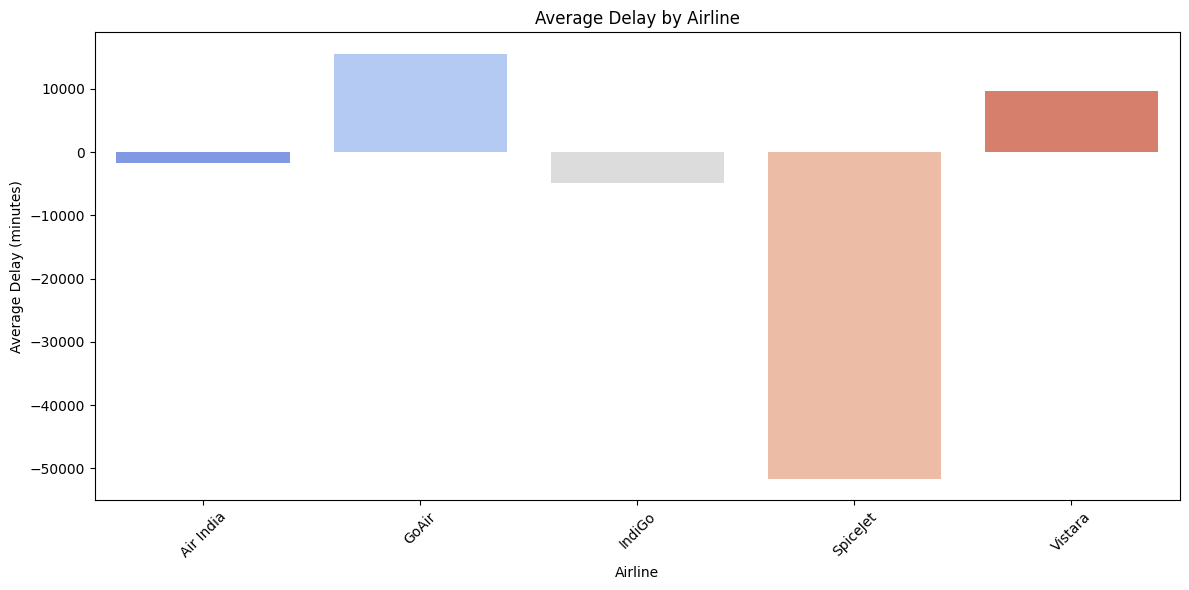

In [60]:
#Bar chart of average delay by airline. 
avg_delay_per_airline = df.groupby('Airline')['Delay_Minutes'].mean().reset_index().round(2)
plt.figure(figsize=(12,6))
sns.barplot(data=avg_delay_per_airline, x='Airline', y='Delay_Minutes', palette='coolwarm')
plt.title('Average Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

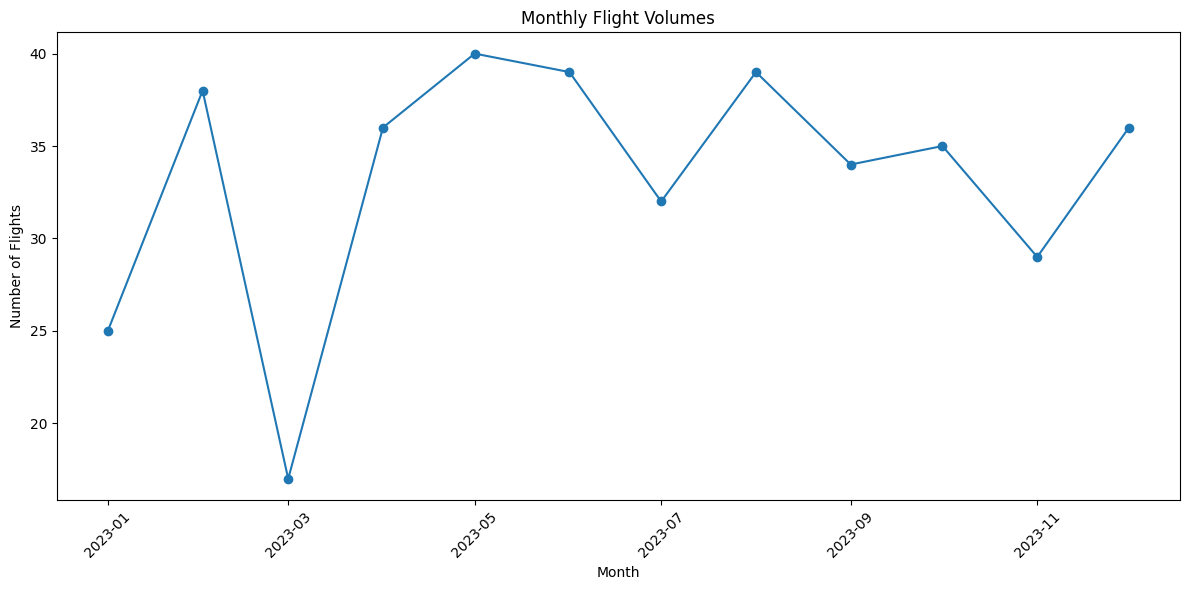

In [61]:
# 2. Line chart: monthly flight volumes
df['Month'] = df['Date'].dt.to_period('M')  # convert to monthly period
monthly_volumes = df.groupby('Month').size().reset_index(name='Flight_Count')
plt.figure(figsize=(12,6))
plt.plot(monthly_volumes['Month'].dt.to_timestamp(), monthly_volumes['Flight_Count'], marker='o')
plt.title('Monthly Flight Volumes')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

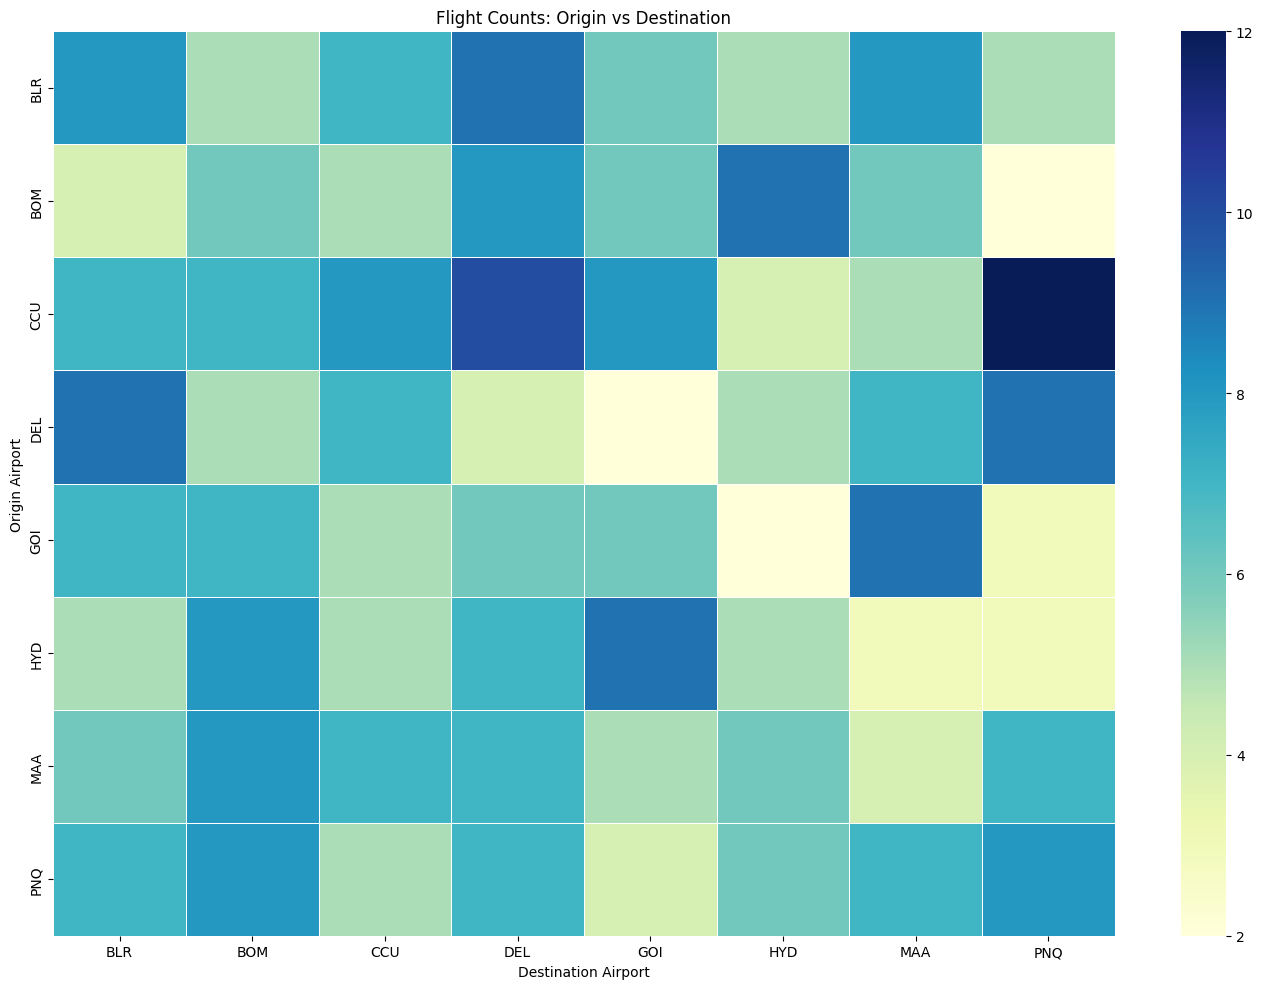

In [65]:

# 3. Heatmap: origin vs destination flight counts
route_counts = df.groupby(['Origin_Airport', 'Destination_Airport']).size().reset_index(name='Flight_Count')
pivot_table = route_counts.pivot(index='Origin_Airport', columns='Destination_Airport', values='Flight_Count').fillna(0)
plt.figure(figsize=(14,10))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=0.5)
plt.title('Flight Counts: Origin vs Destination')
plt.xlabel('Destination Airport')
plt.ylabel('Origin Airport')
plt.tight_layout()
plt.show()